## Import packages

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.ensemble import RandomForestRegressor

## Step I. Load data

In [3]:
train = pd.read_csv('train.csv')
X_test = pd.read_csv('X_test.csv')

X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

## Step II. Build the model and perform parameter tuning

In [4]:
def modelfit(reg, train, target, performCV=True, cv=10, printFeatureImportance=True):
    reg.fit(train, target)
    pred = reg.predict(train)
    train_r2_score = r2_score(target, pred)
    
    print('\nModel Report')
    print('Train_coef_of_det: %0.6f' %(train_r2_score))
    
    if performCV:
        cv_r2_score = cross_val_score(reg, train, target, cv=cv, scoring='r2', n_jobs=-1)
        print('CV_coef_of_det: Mean-%0.6f | Std-%0.6f | Min-%0.6f | Max-%0.6f' %(np.mean(cv_r2_score),
            np.std(cv_r2_score), np.min(cv_r2_score), np.max(cv_r2_score)))

    if printFeatureImportance:
        feat_imp = pd.Series(reg.feature_importances_, 
                             index=train.columns.to_series().tolist()).sort_values(ascending=False)
        rcParams['figure.figsize'] = 20, 6
        feat_imp.plot(kind='bar')
        plt.title('Feature importance')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.show() 

### Baseline model

In [5]:
params = {}
grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.849300297698


In [9]:
params = {}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None,
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
        max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False, n_jobs=1,
        random_state=10, verbose=0, warm_start=False), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.848011056735


### Grid search

In [10]:
params = {}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=10, max_depth=None, max_features='auto',
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, 
        bootstrap=True, criterion='mse', oob_score=False, max_leaf_nodes=None, n_jobs=-1,
        verbose=0, warm_start=False, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.848011056735


In [11]:
params = {'n_estimators': range(10,110,10)}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=10, max_depth=None, max_features='auto',
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, 
        bootstrap=True, criterion='mse', oob_score=False, max_leaf_nodes=None, n_jobs=-1,
        verbose=0, warm_start=False, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'n_estimators': 70}
0.866444115916


In [12]:
params = {'n_estimators': range(70,700,30)}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=10, max_depth=None, max_features='auto',
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, 
        bootstrap=True, criterion='mse', oob_score=False, max_leaf_nodes=None, n_jobs=-1,
        verbose=0, warm_start=False, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'n_estimators': 70}
0.866444115916


In [13]:
params = {'max_features': [i/10.0 for i in range(1,11)]}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=70, max_depth=None, max_features='auto',
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, 
        bootstrap=True, criterion='mse', oob_score=False, max_leaf_nodes=None, n_jobs=-1,
        verbose=0, warm_start=False, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'max_features': 0.5}
0.87503723062


In [14]:
params = {'max_features': [i/100.0 for i in range(44,56)]}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=70, max_depth=None, max_features='auto',
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, 
        bootstrap=True, criterion='mse', oob_score=False, max_leaf_nodes=None, n_jobs=-1,
        verbose=0, warm_start=False, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'max_features': 0.52}
0.875910444824


In [15]:
params = {'max_features': [i/1000.0 for i in range(514,526)]}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=70, max_depth=None, max_features='auto',
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, 
        bootstrap=True, criterion='mse', oob_score=False, max_leaf_nodes=None, n_jobs=-1,
        verbose=0, warm_start=False, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'max_features': 0.519}
0.875910444824


In [16]:
params = {'min_samples_split': range(2,10)}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=70, max_depth=None, max_features=0.52,
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, 
        bootstrap=True, criterion='mse', oob_score=False, max_leaf_nodes=None, n_jobs=-1,
        verbose=0, warm_start=False, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_samples_split': 2}
0.875910444824


In [17]:
params = {'min_samples_leaf': range(1,10)}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=70, max_depth=None, max_features=0.52,
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, 
        bootstrap=True, criterion='mse', oob_score=False, max_leaf_nodes=None, n_jobs=-1,
        verbose=0, warm_start=False, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_samples_leaf': 1}
0.875910444824


In [19]:
params = {'min_weight_fraction_leaf': [i/10.0 for i in range(0,6)]}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=70, max_depth=None, max_features=0.52,
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, 
        bootstrap=True, criterion='mse', oob_score=False, max_leaf_nodes=None, n_jobs=-1,
        verbose=0, warm_start=False, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_weight_fraction_leaf': 0.0}
0.875910444824


In [20]:
params = {'min_weight_fraction_leaf': [i/100.0 for i in range(0,6)]}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=70, max_depth=None, max_features=0.52,
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, 
        bootstrap=True, criterion='mse', oob_score=False, max_leaf_nodes=None, n_jobs=-1,
        verbose=0, warm_start=False, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_weight_fraction_leaf': 0.0}
0.875910444824


In [21]:
params = {'min_impurity_split': [10**(-i) for i in range(0,11)]}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=70, max_depth=None, max_features=0.52,
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, 
        bootstrap=True, criterion='mse', oob_score=False, max_leaf_nodes=None, n_jobs=-1,
        verbose=0, warm_start=False, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'min_impurity_split': 1}
0.875910444824


In [22]:
params = {'bootstrap': [True,False]}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=70, max_depth=None, max_features=0.52,
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, 
        bootstrap=True, criterion='mse', oob_score=False, max_leaf_nodes=None, n_jobs=-1,
        verbose=0, warm_start=False, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'bootstrap': True}
0.875910444824


### Final model

In [23]:
params = {}
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=70, max_depth=None, max_features=0.52,
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, 
        bootstrap=True, criterion='mse', oob_score=False, max_leaf_nodes=None, n_jobs=-1,
        verbose=0, warm_start=False, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.875910444824



Model Report
Train_coef_of_det: 0.982054
CV_coef_of_det: Mean-0.875910 | Std-0.037222 | Min-0.776847 | Max-0.921286


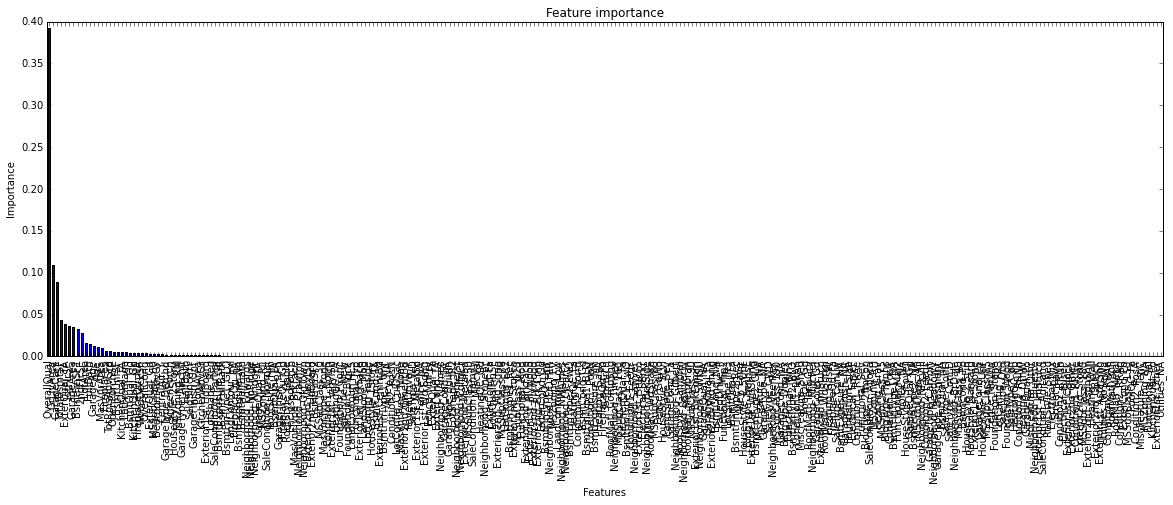

In [24]:
reg1 = RandomForestRegressor(n_estimators=70, max_depth=None, max_features=0.52,
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_split=1e-07, 
        bootstrap=True, criterion='mse', oob_score=False, max_leaf_nodes=None, n_jobs=-1,
        verbose=0, warm_start=False, random_state=10)
modelfit(reg1, X_train, y_train)

### Grid search + Random search

In [ ]:
params = {
          'n_estimators': range(10,150,10),
          'max_depth': [None],
          'max_features': [i/100.0 for i in range(48,57)],
          'min_samples_split': range(2,8),
          'min_samples_leaf': range(1,8),
          'min_weight_fraction_leaf': [i/100.0 for i in range(0,6)],
          'min_impurity_split': [i/10**8 for i in range(1,101,10)],
          'oob_score': [False],
          'bootstrap': [True],
          'criterion': ['mse'],
          'max_leaf_nodes': [None],
          'n_jobs': [-1],
          'verbose': [0],
          'warm_start': [False],
          'random_state': [10]
         }
rand = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=params, cv=10, scoring='r2',
         n_iter=1000, random_state=10, n_jobs=-1)
rand.fit(X_train, y_train)
print 'Best parameters: \n', rand.best_params_
print '\tBest score: ', rand.best_score_

In [ ]:
params = {}
reg1 = RandomForestRegressor(
                            n_estimators = params['n_estimators'],
                            max_depth = params['max_depth'],
                            max_features = params['max_features'],
                            min_samples_split = params['min_samples_split'],
                            min_samples_leaf = params['min_samples_leaf'],
                            min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                            min_impurity_split = params['min_impurity_split'],
                            oob_score = params['oob_score'],
                            bootstrap = params['bootstrap'],
                            criterion = params['criterion'],
                            max_leaf_nodes = params['max_leaf_nodes'],
                            n_jobs = params['n_jobs'],
                            verbose = params['verbose'],
                            warm_start = params['warm_start'],
                            random_state = params['random_state']
                            )
modelfit(reg1, X_train, y_train)

### Grid search + Bayesian optimization ( 'hyperopt' package )

In [27]:
min_score = float('inf')
best_params = ''
c = 0

def score(params):
    global c, min_score, best_params
    c += 1
    print "Interation no.: ", c
    print "Training with params : "
    print params
    reg = RandomForestRegressor(
                                n_estimators = params['n_estimators'],
                                max_depth = params['max_depth'],
                                max_features = params['max_features'],
                                min_samples_split = params['min_samples_split'],
                                min_samples_leaf = params['min_samples_leaf'],
                                min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                                min_impurity_split = params['min_impurity_split'],
                                oob_score = params['oob_score'],
                                bootstrap = params['bootstrap'],
                                criterion = params['criterion'],
                                max_leaf_nodes = params['max_leaf_nodes'],
                                n_jobs = params['n_jobs'],
                                verbose = params['verbose'],
                                warm_start = params['warm_start'],
                                random_state = params['random_state']
                                )
    cv_r2_score = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2', n_jobs=-1)
    score = 1 - np.mean(cv_r2_score) 
    if score < min_score:
        min_score = score
        best_params = params     
    print "\tScore: {0}".format(1-score)
    print "\tBest score: {0}\n".format(1-min_score)
    return {'loss': score, 'status': STATUS_OK}

def optimize():
    space = {
              'n_estimators': hp.choice('n_estimators', range(10,150,10)),
              'max_depth': hp.choice('max_depth', [None]),
              'max_features': hp.uniform('max_features', 0.48, 0.57),
              'min_samples_split': hp.choice('min_samples_split', range(2,8)),
              'min_samples_leaf': hp.choice('min_samples_leaf', range(1,8)),
              'min_weight_fraction_leaf': hp.uniform('min_weight_fraction_leaf', 0.0, 0.06),
              'min_impurity_split': hp.uniform('min_impurity_split', 1e-8, 1e-6),
              'oob_score': hp.choice('oob_score', [False]),
              'bootstrap': hp.choice('bootstrap', [True]),
              'criterion': hp.choice('criterion', ['mse']),
              'max_leaf_nodes': hp.choice('max_leaf_nodes', [None]),
              'n_jobs': hp.choice('n_jobs', [-1]),
              'verbose': hp.choice('verbose', [0]),
              'warm_start': hp.choice('warm_start', [False]),
              'random_state': hp.choice('random_state', [10])        
             }
    best = fmin(score, space, algo=tpe.suggest, max_evals=1000)    
  
optimize()
print 'Best parameters:'
print best_params
print "\tScore {0}".format(1-min_score)

Interation no.:  1
Training with params : 
{'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 2, 'n_estimators': 40, 'max_features': 0.4952799616641823, 'min_weight_fraction_leaf': 0.0342812034443316, 'criterion': 'mse', 'random_state': 10, 'min_impurity_split': 9.636959667100493e-07, 'min_samples_split': 2, 'max_depth': None}
	Score: 0.811802310231
	Best score: 0.811802310231

Interation no.:  2
Training with params : 
{'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 6, 'n_estimators': 80, 'max_features': 0.5283700443237429, 'min_weight_fraction_leaf': 0.01161858245311701, 'criterion': 'mse', 'random_state': 10, 'min_impurity_split': 1.364784460470199e-07, 'min_samples_split': 5, 'max_depth': None}
	Score: 0.851339184025
	Best score: 0.851339184025

Interation no.:  3
Training with params : 
{'warm_start': False, 'oob_sco

Performance is not so good as the grid search. The best value of 'n_estimators' is at the edge of its specified range. So, let's increase the range.  

In [32]:
min_score = float('inf')
best_params = ''
c = 0

def score(params):
    global c, min_score, best_params
    c += 1
    print "Interation no.: ", c
    print "Training with params : "
    print params
    reg = RandomForestRegressor(
                                n_estimators = params['n_estimators'],
                                max_depth = params['max_depth'],
                                max_features = params['max_features'],
                                min_samples_split = params['min_samples_split'],
                                min_samples_leaf = params['min_samples_leaf'],
                                min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                                min_impurity_split = params['min_impurity_split'],
                                oob_score = params['oob_score'],
                                bootstrap = params['bootstrap'],
                                criterion = params['criterion'],
                                max_leaf_nodes = params['max_leaf_nodes'],
                                n_jobs = params['n_jobs'],
                                verbose = params['verbose'],
                                warm_start = params['warm_start'],
                                random_state = params['random_state']
                                )
    cv_r2_score = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2', n_jobs=-1)
    score = 1 - np.mean(cv_r2_score) 
    if score < min_score:
        min_score = score
        best_params = params     
    print "\tScore: {0}".format(1-score)
    print "\tBest score: {0}\n".format(1-min_score)
    return {'loss': score, 'status': STATUS_OK}

def optimize():
    space = {
              'n_estimators': hp.choice('n_estimators', range(10,300,10)),
              'max_depth': hp.choice('max_depth', [None]),
              'max_features': hp.uniform('max_features', 0.48, 0.57),
              'min_samples_split': hp.choice('min_samples_split', range(2,8)),
              'min_samples_leaf': hp.choice('min_samples_leaf', range(1,8)),
              'min_weight_fraction_leaf': hp.uniform('min_weight_fraction_leaf', 0.0, 0.06),
              'min_impurity_split': hp.uniform('min_impurity_split', 1e-8, 1e-6),
              'oob_score': hp.choice('oob_score', [False]),
              'bootstrap': hp.choice('bootstrap', [True]),
              'criterion': hp.choice('criterion', ['mse']),
              'max_leaf_nodes': hp.choice('max_leaf_nodes', [None]),
              'n_jobs': hp.choice('n_jobs', [-1]),
              'verbose': hp.choice('verbose', [0]),
              'warm_start': hp.choice('warm_start', [False]),
              'random_state': hp.choice('random_state', [10])        
             }
    best = fmin(score, space, algo=tpe.suggest, max_evals=1000)    
  
optimize()
print 'Best parameters:'
print best_params
print "\tScore {0}".format(1-min_score)

Interation no.:  1
Training with params : 
{'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 7, 'n_estimators': 220, 'max_features': 0.513962903684272, 'min_weight_fraction_leaf': 0.044700959015190216, 'criterion': 'mse', 'random_state': 10, 'min_impurity_split': 6.91653085035247e-07, 'min_samples_split': 7, 'max_depth': None}
	Score: 0.798141374573
	Best score: 0.798141374573

Interation no.:  2
Training with params : 
{'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 5, 'n_estimators': 230, 'max_features': 0.5565017164711592, 'min_weight_fraction_leaf': 0.009703973149464955, 'criterion': 'mse', 'random_state': 10, 'min_impurity_split': 6.840343369727801e-07, 'min_samples_split': 7, 'max_depth': None}
	Score: 0.855767929833
	Best score: 0.855767929833

Interation no.:  3
Training with params : 
{'warm_start': False, 'oob_

Performance is still not so good as the grid search. So, it's better to use grid search parameters rather than those of grid search + bayesian optimisation.


Model Report
Train_coef_of_det: 0.972423
CV_coef_of_det: Mean-0.874113 | Std-0.043907 | Min-0.759390 | Max-0.923131


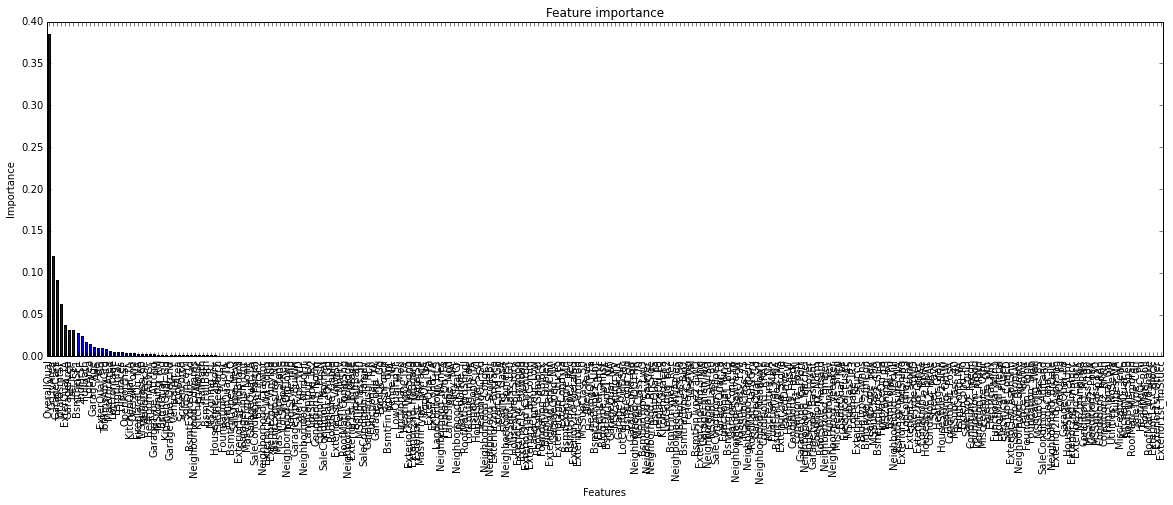

In [31]:
params = {'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'verbose': 0, 'max_leaf_nodes': None,
          'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 140, 'max_features': 0.4897029760922001,
          'min_weight_fraction_leaf': 2.88787614760804e-06, 'criterion': 'mse', 'random_state': 10,
          'min_impurity_split': 9.842189877956365e-07, 'min_samples_split': 6, 'max_depth': None}
reg1 = RandomForestRegressor(
                            n_estimators = params['n_estimators'],
                            max_depth = params['max_depth'],
                            max_features = params['max_features'],
                            min_samples_split = params['min_samples_split'],
                            min_samples_leaf = params['min_samples_leaf'],
                            min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                            min_impurity_split = params['min_impurity_split'],
                            oob_score = params['oob_score'],
                            bootstrap = params['bootstrap'],
                            criterion = params['criterion'],
                            max_leaf_nodes = params['max_leaf_nodes'],
                            n_jobs = params['n_jobs'],
                            verbose = params['verbose'],
                            warm_start = params['warm_start'],
                            random_state = params['random_state']
                            )
modelfit(reg1, X_train, y_train)

### Grid search + Genetic programming ( 'sklearn-deap' package )

In [ ]:
params = {
          'n_estimators': range(10,150,10),
          'max_depth': [None],
          'max_features': [i/100.0 for i in range(48,57)],
          'min_samples_split': range(2,8),
          'min_samples_leaf': range(1,8),
          'min_weight_fraction_leaf': [i/100.0 for i in range(0,6)],
          'min_impurity_split': [i/10**8 for i in range(1,101,10)],
          'oob_score': [False],
          'bootstrap': [True],
          'criterion': ['mse'],
          'max_leaf_nodes': [None],
          'n_jobs': [-1],
          'verbose': [0],
          'warm_start': [False],
          'random_state': [10]
         }
evol = EvolutionaryAlgorithmSearchCV(estimator=RandomForestRegressor(), params=params, cv=10,
        scoring='r2', population_size=50, gene_mutation_prob=0.1, gene_crossover_prob=0.5, tournament_size=3,
        generations_number=10, verbose=True, n_jobs=-1)
evol.fit(X_train, y_train)

In [ ]:
params = {}
reg1 = RandomForestRegressor(
                            n_estimators = params['n_estimators'],
                            max_depth = params['max_depth'],
                            max_features = params['max_features'],
                            min_samples_split = params['min_samples_split'],
                            min_samples_leaf = params['min_samples_leaf'],
                            min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                            min_impurity_split = params['min_impurity_split'],
                            oob_score = params['oob_score'],
                            bootstrap = params['bootstrap'],
                            criterion = params['criterion'],
                            max_leaf_nodes = params['max_leaf_nodes'],
                            n_jobs = params['n_jobs'],
                            verbose = params['verbose'],
                            warm_start = params['warm_start'],
                            random_state = params['random_state']
                            )
modelfit(reg1, X_train, y_train)

### Make predictions and save results

In [26]:
test_pred = reg1.predict(X_test)
dictn = {'Id': range(1461,2920), 'SalePrice': test_pred}
res = pd.DataFrame(dictn)
res.to_csv('submission.csv', index=0)